In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -3.4 < rapidity < -3.1

Y_OS = [11856.0, 11631.0, 11425.0, 11231.0, 10765.0, 10640.0, 10560.0, 10406.0, 10105.0, 9671.0, 9592.0, 9442.0, 8944.0, 8908.0, 8693.0, 8302.0, 8190.0, 7972.0, 7942.0, 7569.0, 7241.0, 7297.0, 7270.0, 6960.0, 6627.0, 6388.0, 6169.0, 6064.0, 5810.0, 5679.0, 5529.0, 5324.0, 5441.0, 5096.0, 4912.0, 4852.0, 4691.0, 4524.0, 4502.0, 4303.0, 4165.0, 4205.0, 4085.0, 3838.0, 3825.0, 3654.0, 3667.0, 3486.0, 3434.0, 3307.0, 3305.0, 3134.0, 3099.0, 2979.0, 2901.0, 2818.0, 2793.0, 2762.0, 2649.0, 2615.0, 2503.0, 2624.0, 2481.0, 2432.0, 2535.0, 2393.0, 2530.0, 2545.0, 2624.0, 2677.0, 2886.0, 3157.0, 3466.0, 3930.0, 4531.0, 5535.0, 6312.0, 7409.0, 8247.0, 8884.0, 8901.0, 8180.0, 7058.0, 5489.0, 4329.0, 3081.0, 2410.0, 1918.0, 1568.0, 1416.0, 1215.0, 1246.0, 1044.0, 976.0, 951.0, 995.0, 886.0, 863.0, 884.0, 804.0, 855.0, 806.0, 784.0, 784.0, 864.0, 792.0, 796.0, 830.0, 774.0, 801.0, 804.0, 725.0, 744.0, 722.0, 668.0, 595.0, 549.0, 556.0, 527.0, 510.0, 530.0, 484.0, 516.0, 530.0, 455.0, 473.0, 470.0, 448.0, 465.0, 428.0, 453.0, 416.0, 437.0, 432.0, 370.0, 399.0, 409.0, 331.0, 352.0, 338.0, 339.0, 365.0, 331.0, 285.0, 328.0, 321.0, 277.0, 298.0, 314.0, 301.0, 272.0, 279.0, 287.0, 263.0, 239.0, 245.0, 252.0, 219.0, 213.0, 261.0, 235.0, 250.0, 222.0, 255.0, 217.0, 221.0, 196.0, 215.0, 215.0, 190.0, 200.0, 187.0, 192.0, 194.0, 182.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [2262.0, 2239.0, 2214.0, 2081.0, 2067.0, 2039.0, 2019.0, 1974.0, 1859.0, 1834.0, 1786.0, 1763.0, 1747.0, 1732.0, 1615.0, 1554.0, 1546.0, 1532.0, 1487.0, 1461.0, 1454.0, 1329.0, 1406.0, 1267.0, 1229.0, 1199.0, 1178.0, 1167.0, 1106.0, 1081.0, 1165.0, 1068.0, 1037.0, 1004.0, 1063.0, 941.0, 908.0, 980.0, 894.0, 873.0, 874.0, 835.0, 835.0, 778.0, 779.0, 778.0, 753.0, 713.0, 691.0, 720.0, 699.0, 700.0, 682.0, 616.0, 620.0, 670.0, 575.0, 591.0, 641.0, 590.0, 577.0, 567.0, 538.0, 510.0, 509.0, 492.0, 495.0, 481.0, 487.0, 474.0, 456.0, 451.0, 434.0, 447.0, 432.0, 448.0, 405.0, 410.0, 417.0, 369.0, 356.0, 373.0, 373.0, 332.0, 371.0, 343.0, 340.0, 338.0, 316.0, 321.0, 322.0, 273.0, 285.0, 286.0, 289.0, 274.0, 283.0, 267.0, 268.0, 259.0, 255.0, 245.0, 246.0, 246.0, 216.0, 231.0, 238.0, 232.0, 213.0, 210.0, 216.0, 225.0, 226.0, 187.0, 160.0, 209.0, 189.0, 190.0, 187.0, 186.0, 208.0, 159.0, 172.0, 181.0, 152.0, 121.0, 161.0, 162.0, 144.0, 155.0, 169.0, 142.0, 131.0, 140.0, 146.0, 139.0, 132.0, 131.0, 149.0, 125.0, 129.0, 114.0, 103.0, 128.0, 120.0, 119.0, 116.0, 109.0, 103.0, 128.0, 117.0, 81.0, 139.0, 117.0, 97.0, 89.0, 106.0, 107.0, 98.0, 81.0, 99.0, 91.0, 83.0, 92.0, 85.0, 83.0, 84.0, 95.0, 84.0, 89.0, 88.0, 78.0, 82.0, 57.0, 77.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [23.0, 12.0, 16.0, 15.0, 20.0, 25.0, 14.0, 28.0, 28.0, 32.0, 27.0, 22.0, 34.0, 38.0, 42.0, 31.0, 44.0, 47.0, 49.0, 41.0, 47.0, 49.0, 46.0, 60.0, 57.0, 59.0, 75.0, 70.0, 69.0, 84.0, 76.0, 92.0, 80.0, 90.0, 106.0, 83.0, 86.0, 103.0, 114.0, 139.0, 109.0, 143.0, 133.0, 144.0, 138.0, 164.0, 159.0, 187.0, 209.0, 246.0, 258.0, 228.0, 256.0, 297.0, 295.0, 357.0, 428.0, 433.0, 462.0, 542.0, 650.0, 671.0, 780.0, 915.0, 1107.0, 1215.0, 1484.0, 1722.0, 2110.0, 2475.0, 3020.0, 3663.0, 4538.0, 5968.0, 7573.0, 9951.0, 13387.0, 17240.0, 21058.0, 24343.0, 24791.0, 23195.0, 18645.0, 13620.0, 8560.0, 4975.0, 2714.0, 1453.0, 800.0, 452.0, 262.0, 202.0, 142.0, 97.0, 71.0, 61.0, 33.0, 46.0, 32.0, 23.0, 14.0, 17.0, 21.0, 12.0, 20.0, 13.0, 8.0, 11.0, 11.0, 6.0, 4.0, 4.0, 8.0, 10.0, 6.0, 8.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 4.0, 1.0, 2.0, 7.0, 3.0, 3.0, 0.0, 0.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [5.0, 0.0, 5.0, 5.0, 4.0, 6.0, 4.0, 7.0, 2.0, 10.0, 4.0, 7.0, 5.0, 7.0, 9.0, 12.0, 6.0, 7.0, 12.0, 7.0, 16.0, 8.0, 9.0, 10.0, 12.0, 13.0, 19.0, 20.0, 15.0, 17.0, 19.0, 17.0, 12.0, 25.0, 18.0, 21.0, 20.0, 33.0, 20.0, 21.0, 32.0, 20.0, 29.0, 25.0, 26.0, 22.0, 31.0, 38.0, 25.0, 27.0, 49.0, 47.0, 40.0, 41.0, 50.0, 43.0, 57.0, 49.0, 47.0, 49.0, 52.0, 66.0, 62.0, 66.0, 76.0, 65.0, 61.0, 62.0, 75.0, 76.0, 73.0, 86.0, 84.0, 83.0, 91.0, 98.0, 121.0, 115.0, 113.0, 141.0, 139.0, 124.0, 179.0, 198.0, 206.0, 237.0, 284.0, 290.0, 375.0, 392.0, 409.0, 515.0, 522.0, 611.0, 740.0, 833.0, 852.0, 1068.0, 1249.0, 1469.0, 1758.0, 2121.0, 2774.0, 3462.0, 4583.0, 5801.0, 7365.0, 9506.0, 11156.0, 12232.0, 12120.0, 10867.0, 8635.0, 6181.0, 3760.0, 2263.0, 1239.0, 645.0, 352.0, 204.0, 143.0, 95.0, 81.0, 47.0, 37.0, 22.0, 21.0, 18.0, 20.0, 13.0, 12.0, 12.0, 12.0, 10.0, 6.0, 6.0, 7.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 0.0, 4.0, 2.0, 4.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 3.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [28.0, 12.0, 21.0, 20.0, 24.0, 31.0, 18.0, 35.0, 30.0, 42.0, 31.0, 29.0, 39.0, 45.0, 51.0, 43.0, 50.0, 54.0, 61.0, 48.0, 63.0, 57.0, 55.0, 70.0, 69.0, 72.0, 94.0, 90.0, 84.0, 101.0, 95.0, 109.0, 92.0, 115.0, 124.0, 104.0, 106.0, 136.0, 134.0, 160.0, 141.0, 163.0, 162.0, 169.0, 164.0, 186.0, 190.0, 225.0, 234.0, 273.0, 307.0, 275.0, 296.0, 338.0, 345.0, 400.0, 485.0, 482.0, 509.0, 591.0, 702.0, 737.0, 842.0, 981.0, 1183.0, 1280.0, 1545.0, 1784.0, 2185.0, 2551.0, 3093.0, 3749.0, 4622.0, 6051.0, 7664.0, 10049.0, 13508.0, 17355.0, 21171.0, 24484.0, 24930.0, 23319.0, 18824.0, 13818.0, 8766.0, 5212.0, 2998.0, 1743.0, 1175.0, 844.0, 671.0, 717.0, 664.0, 708.0, 811.0, 894.0, 885.0, 1114.0, 1281.0, 1492.0, 1772.0, 2138.0, 2795.0, 3474.0, 4603.0, 5814.0, 7373.0, 9517.0, 11167.0, 12238.0, 12124.0, 10871.0, 8643.0, 6191.0, 3766.0, 2271.0, 1241.0, 648.0, 356.0, 207.0, 147.0, 99.0, 86.0, 51.0, 38.0, 24.0, 28.0, 21.0, 23.0, 13.0, 12.0, 14.0, 13.0, 14.0, 7.0, 7.0, 8.0, 4.0, 4.0, 9.0, 5.0, 4.0, 4.0, 0.0, 6.0, 3.0, 4.0, 5.0, 2.0, 0.0, 0.0, 3.0, 2.0, 0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 1.0, 3.0, 2.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 352871.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

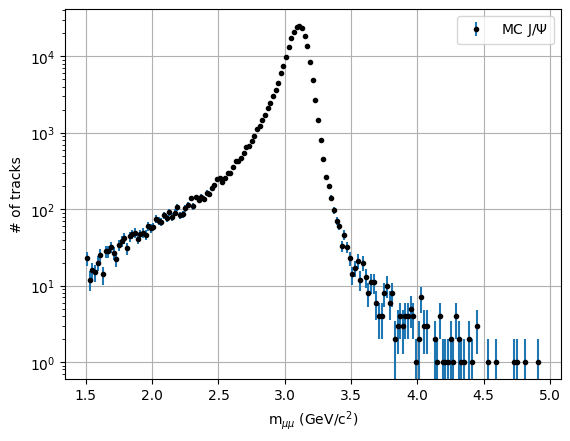

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [25069.99093912729, 3.1013650346318884, 0.061331427557475005, 1.0132221980373848, 3.0369805659846976, 2.304352145905155, 2.917716135169391]
pcov: 
 [[ 1.70004497e+04  1.20517336e-02 -2.72001686e-02 -1.51709028e-01
  -6.10592716e-02 -9.72170008e-01  2.60625475e+00]
 [ 1.20517336e-02  1.42097721e-07 -7.54288714e-08 -2.79594623e-06
   8.05575436e-06 -1.33483200e-06  1.51376122e-06]
 [-2.72001686e-02 -7.54288714e-08  1.14594935e-07  2.46296595e-06
  -5.35269098e-06  5.14451195e-06 -1.27807485e-05]
 [-1.51709028e-01 -2.79594623e-06  2.46296595e-06  1.51589863e-04
  -5.88531298e-04  9.78510250e-05 -2.17480038e-04]
 [-6.10592716e-02  8.05575436e-06 -5.35269098e-06 -5.88531298e-04
   3.23209877e-03 -1.78618202e-04  3.47480020e-04]
 [-9.72170008e-01 -1.33483200e-06  5.14451195e-06  9.78510250e-05
  -1.78618202e-04  1.73210667e-03 -6.84547007e-03]
 [ 2.60625475e+00  1.51376122e-06 -1.27807485e-05 -2.17480038e-04
   3.47480020e-04 -6.84547007e-03  3.63823652e-02]]
residual: 
 {'nfev': 9, 

fit error : 130.38593185266498


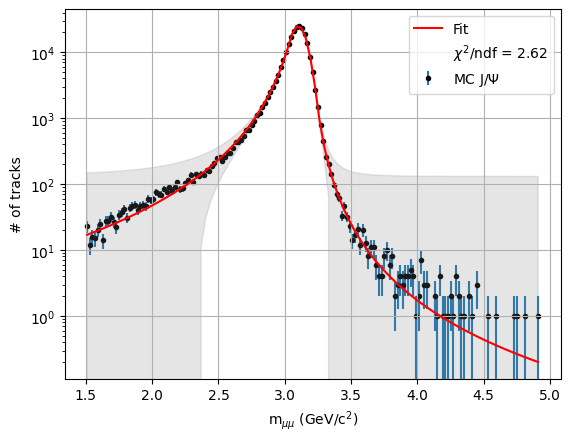

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

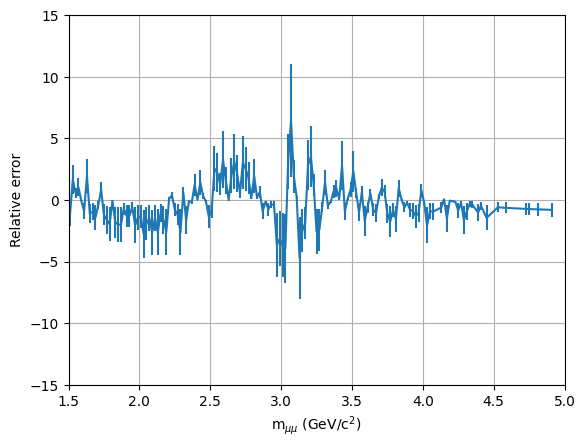

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

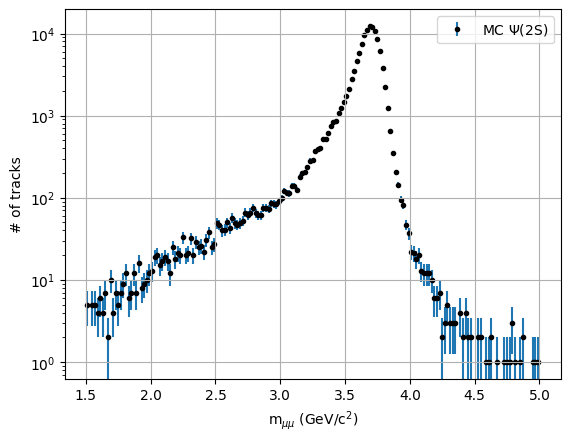

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [12419.928283139569, 3.694306472411269, 0.06328651829131815, 0.9783800143464753, 2.8766460121894535, 2.331786363362061, 2.7937988631213835]
pcov: 
 [[ 5.64227644e+03  8.41730823e-03 -1.87217888e-02 -7.77895692e-02
  -8.28727974e-02 -6.65408333e-01  1.81747723e+00]
 [ 8.41730823e-03  2.05717242e-07 -1.08992078e-07 -3.46542958e-06
   8.39220440e-06 -1.90524319e-06  2.38290526e-06]
 [-1.87217888e-02 -1.08992078e-07  1.64170583e-07  3.04135604e-06
  -5.37907665e-06  7.31931844e-06 -1.84783217e-05]
 [-7.77895692e-02 -3.46542958e-06  3.04135604e-06  1.64770964e-04
  -5.49504833e-04  1.20749381e-04 -2.74221197e-04]
 [-8.28727974e-02  8.39220440e-06 -5.37907665e-06 -5.49504833e-04
   2.68452922e-03 -1.75047532e-04  3.43671757e-04]
 [-6.65408333e-01 -1.90524319e-06  7.31931844e-06  1.20749381e-04
  -1.75047532e-04  2.54118417e-03 -9.97840361e-03]
 [ 1.81747723e+00  2.38290526e-06 -1.84783217e-05 -2.74221197e-04
   3.43671757e-04 -9.97840361e-03  5.18469743e-02]]
residual: 
 {'nfev': 8, 

fit error : 75.11546897165712


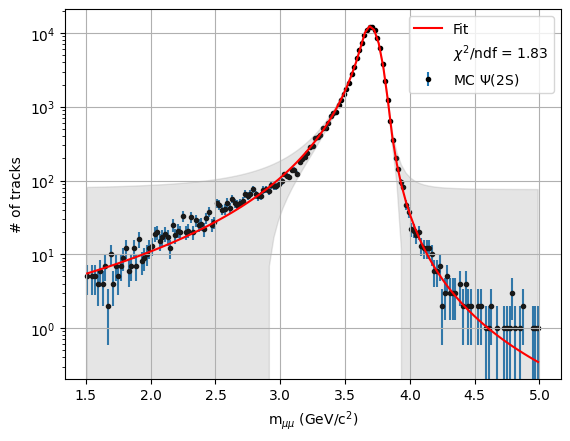

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

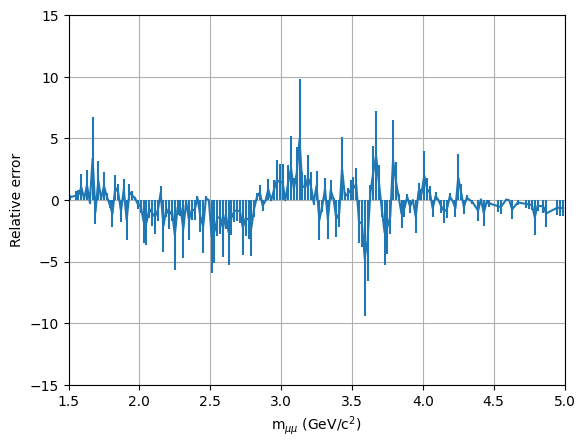

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

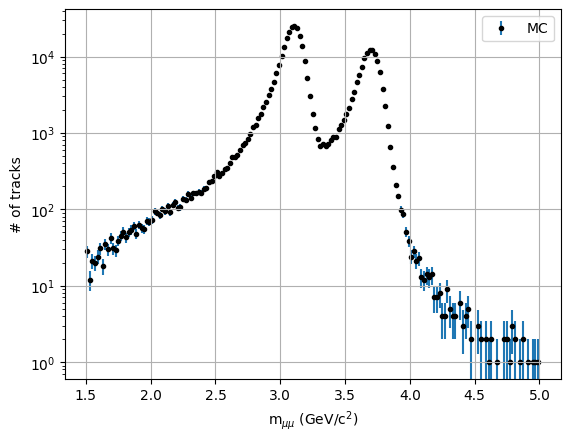

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [25013.691849130046, 3.1012510273927343, 0.061481027532617215, 12408.11747390319, 3.6942239443256453, 0.0634485340285753]
pcov: 
 [[ 1.70482163e+04  8.03679599e-03 -2.25738186e-02 -5.84983776e+01
  -7.19174052e-04  9.47976096e-04]
 [ 8.03679599e-03  8.78463812e-08 -1.96938441e-08  1.72934369e-05
   8.62964541e-10 -7.03660528e-10]
 [-2.25738186e-02 -1.96938441e-08  5.83598483e-08  5.17063338e-04
   5.17168069e-09 -7.40847207e-09]
 [-5.84983776e+01  1.72934369e-05  5.17063338e-04  8.07520014e+03
   9.61098455e-03 -2.27263250e-02]
 [-7.19174052e-04  8.62964541e-10  5.17168069e-09  9.61098455e-03
   1.88285441e-07 -5.58831280e-08]
 [ 9.47976096e-04 -7.03660528e-10 -7.40847207e-09 -2.27263250e-02
  -5.58831280e-08  1.26686751e-07]]
residual: 
 {'nfev': 5, 'fvec': array([-1.00373210e+00,  3.30585816e+00,  7.09243453e-01,  1.13722762e+00,
        4.00306311e-01, -7.40273100e-01,  2.31934428e+00, -1.03965754e+00,
       -1.66505565e-02, -1.69396342e+00,  2.14082983e-01,  8.21304361e-01

fit error : 158.5036795810434


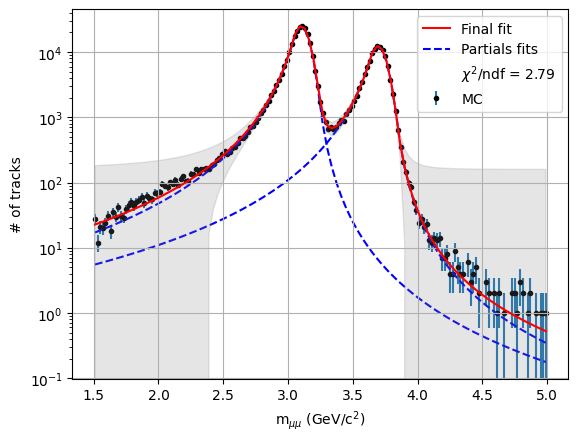

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_15070/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


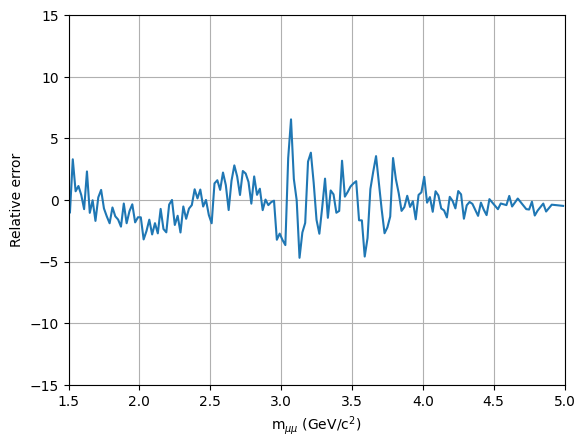

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

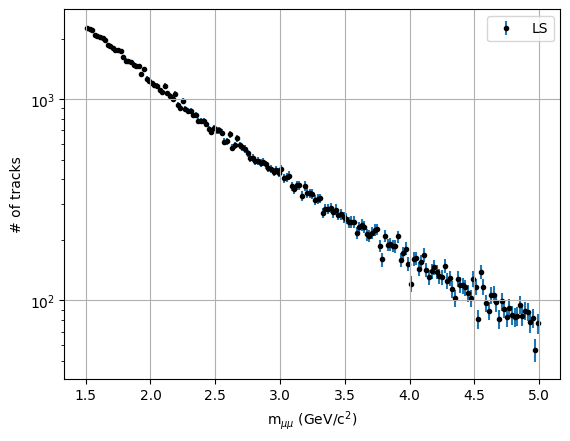

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [7.762756472905699, 6.557212470389213, 5.595661513825048, 5.27151190232654, 4.32193977512703]
pcov: 
 [[ 7.48306092e-05 -1.44673550e-05  1.93901664e-05  5.23462637e-06
   4.07125880e-05]
 [-1.44673550e-05  2.59869361e-05  9.20559597e-06 -1.78182062e-06
   1.77078454e-05]
 [ 1.93901664e-05  9.20559597e-06  6.60749496e-05  5.42600728e-05
  -8.65718743e-06]
 [ 5.23462637e-06 -1.78182062e-06  5.42600728e-05  9.13112877e-05
  -1.37990684e-04]
 [ 4.07125880e-05  1.77078454e-05 -8.65718743e-06 -1.37990684e-04
   1.48858200e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 1.22413262e+00,  4.29775136e-01, -2.91091574e-01,  1.36038889e+00,
        4.51783543e-01, -1.17595651e-01, -8.35651708e-01, -9.72996281e-01,
        5.24012736e-01, -3.01205613e-03,  3.67780525e-02, -4.85937623e-01,
       -1.14954566e+00, -1.81226305e+00,  1.07787742e-02,  5.44787576e-01,
       -2.37338968e-01, -8.43829517e-01, -6.39200771e-01, -8.95488304e-01,
       -1.62073078e+00,  8.12000647e-01, -2.13490937e+00

fit error : 0.04179456645466485


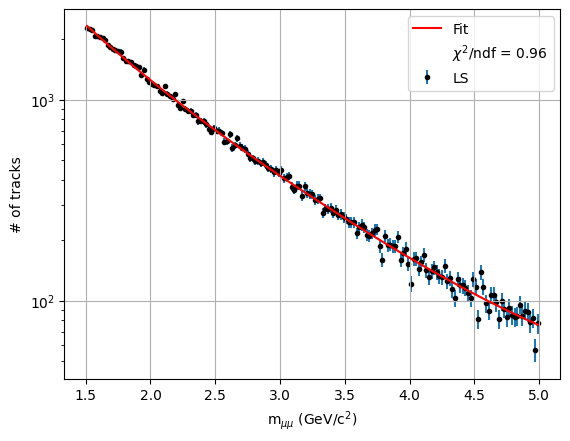

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

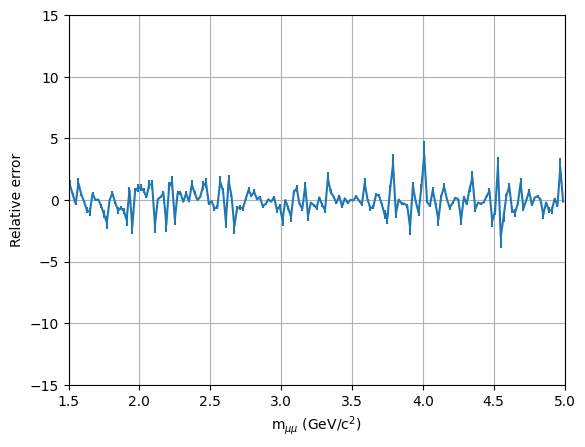

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

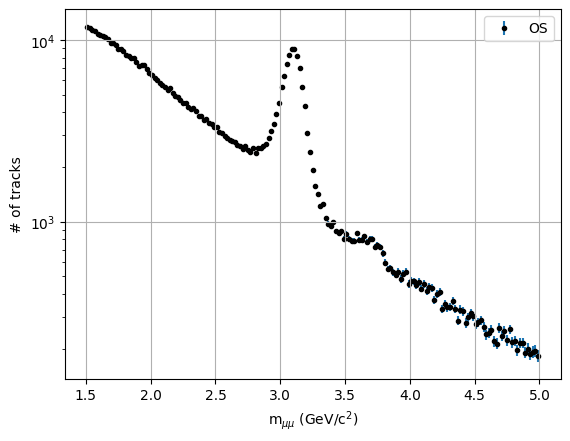

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [7770.188660423748, 3.097559784282973, 0.06746457031322244, 148.04547211372443, 3.695047250657532, 0.06961516891321094, 9.408007985656608, 8.068230051882542, 6.762516893127936, 6.364809563347229, 5.166479798038245]
pcov: 
 [[ 4.73272910e+03  6.71094940e-03 -2.51183222e-02  1.56376077e+01
  -1.37364866e-02  2.66148627e-02 -1.26877369e-02 -8.93198525e-03
  -4.57639476e-02 -2.95943523e-02 -1.98481789e-02]
 [ 6.71094940e-03  3.79213420e-07 -1.33600145e-07 -2.45537804e-04
   2.75640364e-07 -4.87742816e-07  1.04901843e-07  5.07210977e-07
   1.00594469e-06  4.79006850e-07  8.97852871e-07]
 [-2.51183222e-02 -1.33600145e-07  4.26004354e-07  1.25032245e-03
  -6.15586249e-07  1.26748044e-06 -5.52718633e-07 -1.26006619e-06
  -3.36816482e-06 -2.08997030e-06 -1.53481002e-06]
 [ 1.56376077e+01 -2.45537804e-04  1.25032245e-03  4.86900695e+02
   2.39181207e-02 -1.38274765e-01 -8.20612176e-03 -8.77337725e-03
  -5.27881632e-02 -5.73190759e-02  5.57883433e-02]
 [-1.37364866e-02  2.75640364e-07 -6.

fit error : 72.24702042652459


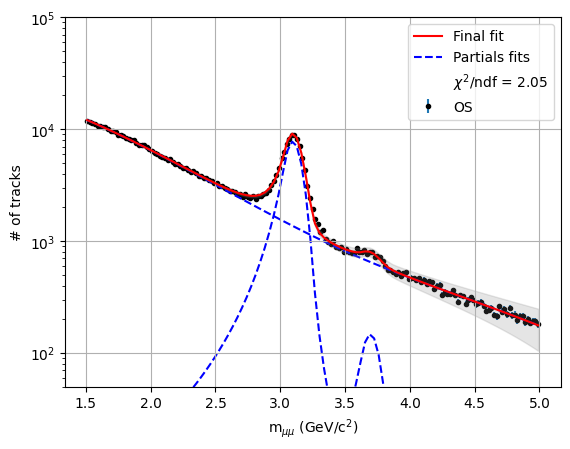

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

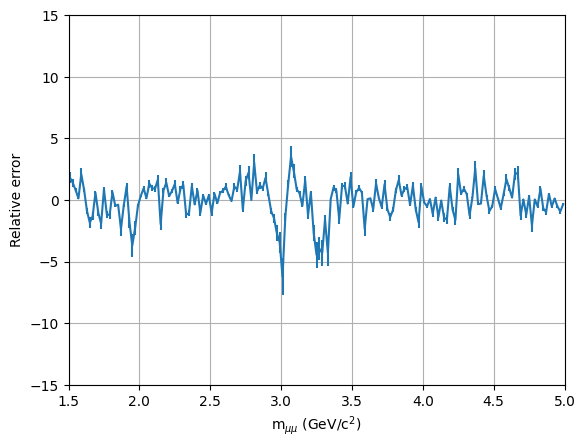

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  78794.61951885752  +/-  1164.4225977603837 (stat.)
